In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import osimport graphviz

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [39]:
urld = 'agaricus-lepiota.data'
urln = 'agaricus-lepiota.names'

In [40]:
data = pd.read_csv(urld)

In [41]:
data=data.rename(columns={'p':'Attribute', 'x':'Cap-shape','s':'Cap-Surface','n':'Cap-Color','t':'Bruises?','p.1':'Odor','f':'Gill-attachment','c':'Gill-spacing','n.1':'Gill-size','k':'Gill-color','e':'Stalk-shape','e.1':'Stalk-root','s.1':'Stalk-surface-above-ring','s.2':'Stalk-surface-below-ring','w':'Stalk-color-above-ring','w.1':'Stalk-color-below-ring','p.2':'Veil-type','w.2':'Veil-color','o':'Ring-number','p.3':'Ring-type','k.1':'Spore-print-color','s.3':'Population','u':'Habitat'})

In [42]:
data.columns

Index(['Attribute', 'Cap-shape', 'Cap-Surface', 'Cap-Color', 'Bruises?',
       'Odor', 'Gill-attachment', 'Gill-spacing', 'Gill-size', 'Gill-color',
       'Stalk-shape', 'Stalk-root', 'Stalk-surface-above-ring',
       'Stalk-surface-below-ring', 'Stalk-color-above-ring',
       'Stalk-color-below-ring', 'Veil-type', 'Veil-color', 'Ring-number',
       'Ring-type', 'Spore-print-color', 'Population', 'Habitat'],
      dtype='object')

In [43]:
mappings = list()
encoder = LabelEncoder()

for column in range(len(data.columns)):
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [44]:
data.sort_values(by=['Attribute'])

,Attribute,Cap-shape,Cap-Surface,Cap-Color,Bruises?,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
3005,0,2,0,2,1,5,1,0,0,9,...,2,3,6,0,2,1,4,3,4,0
3006,0,2,3,4,1,5,1,0,0,7,...,2,7,7,0,2,1,4,2,5,0
3007,0,2,0,2,1,5,1,0,0,7,...,2,3,7,0,2,1,4,2,5,0
3009,0,2,0,3,1,5,1,0,0,10,...,2,7,7,0,2,1,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,1,2,0,3,0,2,1,0,0,3,...,1,4,6,0,2,1,2,1,5,4
5076,1,2,0,9,0,2,1,0,0,3,...,1,0,4,0,2,1,2,1,4,4
5077,1,2,0,9,0,2,1,0,0,3,...,1,0,6,0,2,1,2,1,5,0
5061,1,5,3,3,0,2,1,0,0,7,...,1,0,6,0,2,1,2,1,5,4


In [45]:
data.isnull().sum()

Attribute                   0
Cap-shape                   0
Cap-Surface                 0
Cap-Color                   0
Bruises?                    0
Odor                        0
Gill-attachment             0
Gill-spacing                0
Gill-size                   0
Gill-color                  0
Stalk-shape                 0
Stalk-root                  0
Stalk-surface-above-ring    0
Stalk-surface-below-ring    0
Stalk-color-above-ring      0
Stalk-color-below-ring      0
Veil-type                   0
Veil-color                  0
Ring-number                 0
Ring-type                   0
Spore-print-color           0
Population                  0
Habitat                     0
dtype: int64

In [46]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [47]:
y = data['Attribute']
X = data.drop('Attribute', axis=1)

In [48]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [49]:
X

,Cap-shape,Cap-Surface,Cap-Color,Bruises?,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,1.029843,0.140137,1.765745,1.186092,-1.970181,0.162907,-0.438896,-0.668905,-0.229013,-1.144969,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,0.948192,-0.250545,-1.313112,-0.295537
1,-2.086928,0.140137,1.372944,1.186092,-0.544073,0.162907,-0.438896,-0.668905,0.053446,-1.144969,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,0.948192,-0.250545,-1.313112,0.867566
2,1.029843,0.953230,1.372944,1.186092,0.882034,0.162907,-0.438896,1.494980,0.053446,-1.144969,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,0.948192,-0.670255,-0.514429,2.030668
3,1.029843,0.140137,-0.591064,-0.843105,0.406665,0.162907,2.278445,-0.668905,-0.229013,0.873386,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,-1.272091,-0.250545,-2.910478,-0.295537
4,1.029843,0.953230,1.765745,1.186092,-1.970181,0.162907,-0.438896,-0.668905,0.053446,-1.144969,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,0.948192,-0.670255,-1.313112,-0.295537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,-0.216866,0.140137,-0.198263,-0.843105,0.406665,-6.138481,-0.438896,-0.668905,1.748194,-1.144969,...,0.586433,-0.429195,-0.416587,0.0,-3.978797,-0.256149,0.948192,-1.509675,-2.111795,0.286015
8119,1.029843,0.140137,-0.198263,-0.843105,0.406665,-6.138481,-0.438896,-0.668905,1.748194,-1.144969,...,0.586433,-0.429195,-0.416587,0.0,-8.099640,-0.256149,0.948192,-1.509675,0.284254,0.286015
8120,-0.840220,0.140137,-0.198263,-0.843105,0.406665,-6.138481,-0.438896,-0.668905,0.053446,-1.144969,...,0.586433,-0.429195,-0.416587,0.0,-3.978797,-0.256149,0.948192,-1.509675,-2.111795,0.286015
8121,-0.216866,0.953230,-0.198263,-0.843105,1.832772,0.162907,-0.438896,1.494980,-1.358845,0.873386,...,-0.892945,0.622495,0.632046,0.0,0.142046,-0.256149,-1.272091,1.428295,0.284254,0.286015


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [51]:
log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

In [52]:
np.sum(y) / len(y)

0.48196479133325126

In [53]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [54]:
print(f"Logistic Regression: {log_model.score(X_test, y_test)}")
print(f"Support Vector Machine: {svm_model.score(X_test, y_test)}")

Logistic Regression: 0.9618461538461538
Support Vector Machine: 1.0


In [68]:
# SVM
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [55]:
X_test.shape

(1625, 22)

<Axes: >

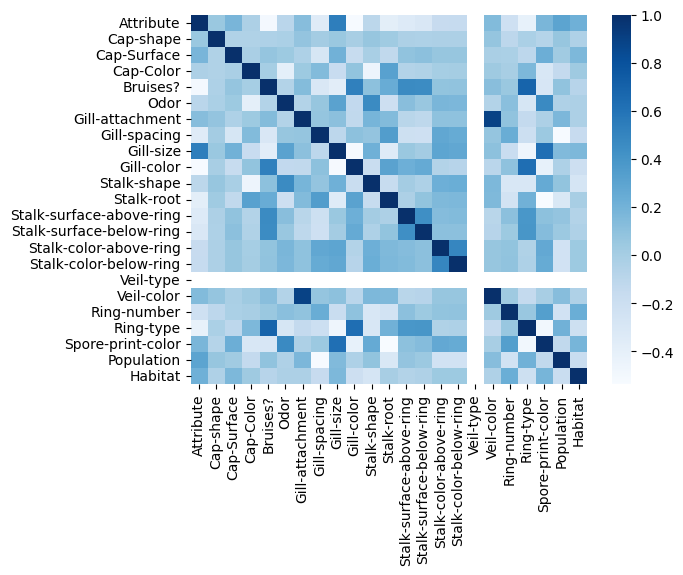

In [56]:
corr = data.corr()
sns.heatmap(corr,cmap="Blues")

In [57]:
dt = DecisionTreeClassifier(random_state = 0 , max_depth = 5)
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [58]:
dt.score(X_train , y_train)

0.979378270236996

In [59]:
predictions = dt.predict(X_test)

In [60]:
accuracy_score(y_test , predictions)

0.9790769230769231

In [61]:
(train,test) = train_test_split(data, test_size=0.3)
train_output = train['Attribute']
train_input = train[[x for x in train if 'Attribute' not in x]]
test_output = test['Attribute']
test_input = test[[x for x in test if 'Attribute' not in x]]

In [62]:
logistic_regression = LogisticRegression()

In [63]:
logistic_regression.fit(train_input, train_output)

C:\Users\Tejo Vardhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
predicted_output = logistic_regression.predict(test_input)

In [65]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_output, predicted_output)
print ("Accuracy of Logistic Regression is %f" %accuracy)

Accuracy of Logistic Regression is 0.950759


Test Accuracy: 100.0%
